**PRACTICA BSP**

Primero importaremos las bibliotecas necesarias.

In [70]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

Leemos los 3 archivos, y almacenamos sus datos en distintas variables.

In [2]:
control_file = 'TrozoC.txt'
gaba_file = 'TrozoG.txt'
recuperacion_file = 'TrozoR.txt'

In [3]:
# Archivo TrozoC
trozoC = pd.read_csv(control_file, sep='\t', skiprows=3, header=None, names=['LP', 'VD'], decimal = ",",  usecols = [0, 1])
TrozoC_LP = trozoC['LP']
TrozoC_VD = trozoC['VD']

# Archivo TrozoR
trozoR = pd.read_csv(recuperacion_file, sep='\t', skiprows=3, header=None, names=['LP', 'VD'], decimal = ",",  usecols = [0, 1])
TrozoR_LP = trozoR['LP']
TrozoR_VD = trozoR['VD']

# Archivo TrozoG
trozoG = pd.read_csv(gaba_file, sep='\t', skiprows=3, header=None, names=['LP', 'VD', 'T'], decimal = ",", usecols = [0, 1, 2])
TrozoG_LP = trozoG['LP']
TrozoG_VD = trozoG['VD']
TrozoG_T = trozoG['T']

In [4]:
trozoC.head(10)

,LP,VD
0,0.004883,0.015259
1,0.001526,0.024109
2,-0.010681,0.031128
3,-0.022278,0.041809
4,-0.028076,0.045471
5,-0.034180,0.047913
6,-0.045166,0.058899
7,-0.048523,0.057068
8,-0.049438,0.062256
9,-0.048828,0.064697


In [5]:
trozoR.head(10)

,LP,VD
0,-0.008240,0.084534
1,-0.009460,0.070190
2,-0.014038,0.049133
3,-0.021973,0.035400
4,-0.035095,0.022888
5,-0.042114,0.008850
6,-0.047607,0.009460
7,-0.057678,0.012207
8,-0.061646,0.018311
9,-0.086060,0.021973


In [6]:
trozoG.head(10)

,LP,VD,T
0,-0.006104,0.064697,0.120239
1,-0.004272,0.075989,0.126343
2,-0.003357,0.087280,0.125427
3,-0.005188,0.092468,0.123596
4,-0.007324,0.093384,0.118713
5,-0.010681,0.089722,0.105896
6,-0.004883,0.086975,0.127258
7,0.004272,0.092468,0.111084
8,0.002441,0.087585,0.114136
9,0.003357,0.080872,0.110779


## Representación gráfica de los datos
Representamos graficamente los datos obtenidos en varios plots para conocer su distribución aproximadamente.

### LP

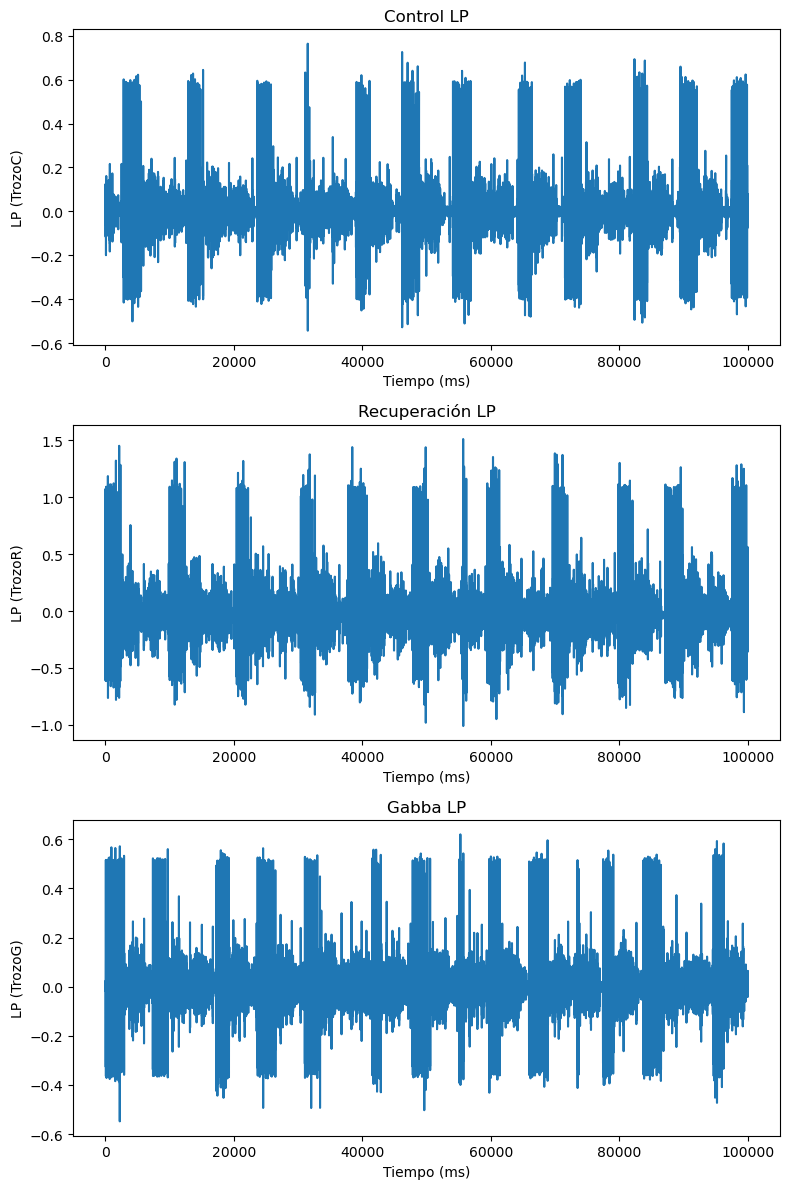

In [7]:
# Gráfico para LP
# Crear una figura con tres subplots en 3 filas y 1 columna
plt.figure(figsize=(8, 12))

# Subplot 1 para TrozoC LP
plt.subplot(311)
plt.title('Control LP')
plt.plot(TrozoC_LP[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoC)')

# Subplot 2 para TrozoR LP
plt.subplot(312)
plt.title('Recuperación LP')
plt.plot(TrozoR_LP[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoR)')

# Subplot 3 para TrozoG LP
plt.subplot(313)
plt.title('Gabba LP')
plt.plot(TrozoG_LP[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoG)')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()


### VD

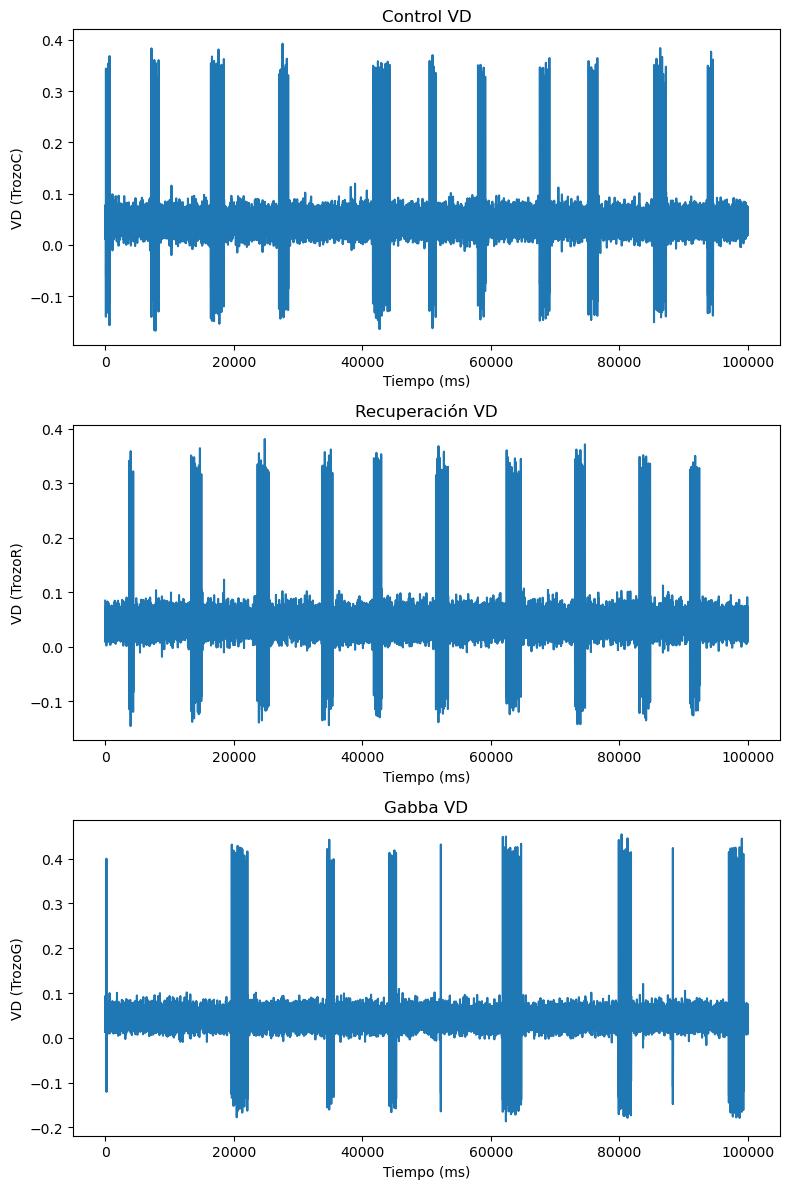

In [8]:
# Gráfico para VD
# Crear una figura con tres subplots en 3 filas y 1 columna
plt.figure(figsize=(8, 12))

# Subplot 1 para TrozoC VD
plt.subplot(311)
plt.title('Control VD')
plt.plot(TrozoC_VD[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('VD (TrozoC)')

# Subplot 2 para TrozoR VD
plt.subplot(312)
plt.title('Recuperación VD')
plt.plot(TrozoR_VD[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('VD (TrozoR)')

# Subplot 3 para TrozoG VD
plt.subplot(313)
plt.title('Gabba VD')
plt.plot(TrozoG_VD[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('VD (TrozoG)')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

### Gabba inyección

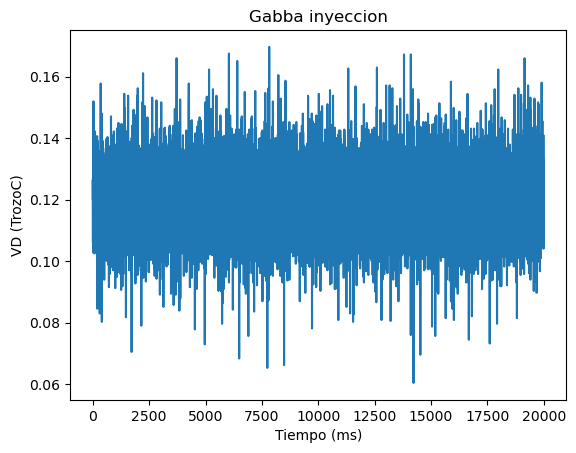

In [9]:
# Gráfico para T

plt.plot(TrozoG_T[0:20000])#bajo a 20000 para que se vea algo
plt.title('Gabba inyeccion')
plt.xlabel('Tiempo (ms)')
plt.ylabel('VD (TrozoC)')

plt.show()

## Discretización usando spikes
Ahora creamos una función que detecte spikes a partir de un umbral. Leemos los datos de entrada y a partir de un umbral determinado, asignaremos '1' o '0' en caso de detectar un spike o no.

In [10]:
def detectar_spikes(datos, umbral):
    result = []

    for i in range(0, len(datos)-1):
        if (datos[i] < umbral) and (datos[i+1] >= umbral):
            result.append(1)
        else:
            result.append(0)
    return result

Representamos gráficamente un ejemplo de la implementación de esta función. Utilizaremos como umbral -0.4 pues con 0.5 no detectamos a penas spikes y con -0.3 detectamos demasiados

In [11]:
det_TrozoC_LP = detectar_spikes(TrozoC_LP, -0.4)
#Elegimos -0.4 pues con -0.5 no detecta casi spikes y con -0.3 detecto demasiados

In [12]:
sum(det_TrozoC_LP)

11266

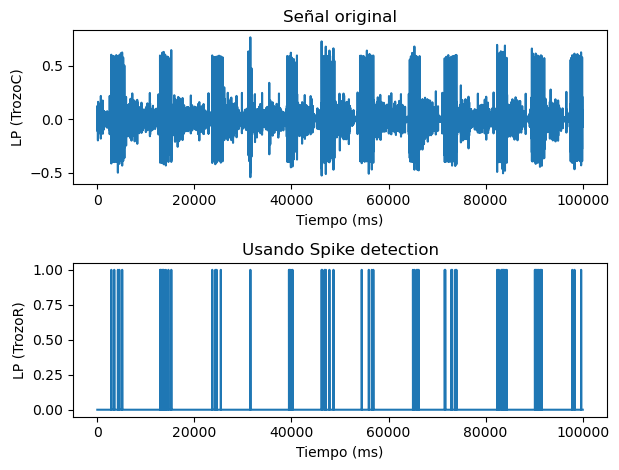

In [13]:
# Subplot 1 para TrozoC LP
plt.subplot(211)
plt.title('Señal original')
plt.plot(TrozoC_LP[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoC)')

# Subplot 2 para detección de spikes en TrozoC LP
plt.subplot(212)
plt.title('Usando Spike detection')
plt.plot(det_TrozoC_LP[0:100000])
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoR)')

# Ajustar el espacio entre subplots
plt.tight_layout()

Incluimos este plot mediate scatter para que se aprecia mejor la diferencia

Text(0, 0.5, 'LP (TrozoR)')

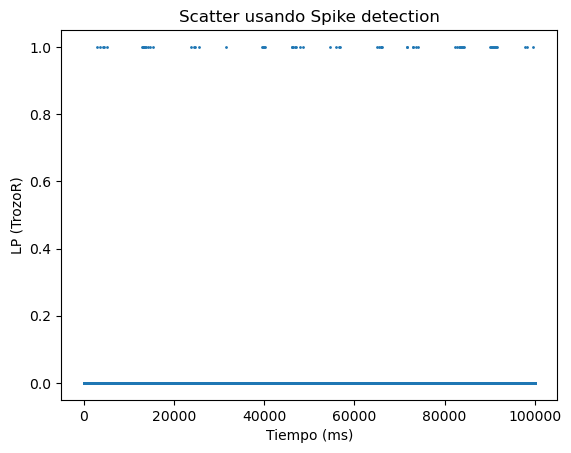

In [14]:
plt.title('Scatter usando Spike detection')
plt.scatter(np.arange(100000),det_TrozoC_LP[0:100000],s=1)
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoR)')

#### Spike en ventana
Ahora usaremos una ventana para discretizar la señal de manera más general, de forma que si existe algún spike en la ventana daremos el valor 1 a toda la ventana. Hemos de tener en cuenta que así se reduce la longitud de la señal

In [15]:
def spikes_windows(datos, umbral, T):
    result = []

    for i in range(0, len(datos)-1, T):
        for j in range(i,i+T): 
            if (datos[j] < umbral) and (datos[j+1] >= umbral):
                result.append(1)
                break
            else:
                result.append(0)
    return result

In [16]:
ventana_TrozoC_LP= spikes_windows(TrozoC_LP, -0.4,2)

In [17]:
sum(ventana_TrozoC_LP)

11266

In [18]:
sum(det_TrozoC_LP)

11266

Text(0, 0.5, 'LP (TrozoC)')

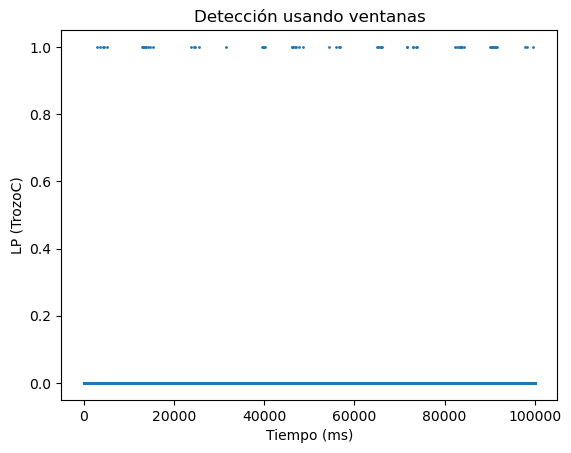

In [19]:
plt.title('Detección usando ventanas')
plt.scatter(np.arange(100000),ventana_TrozoC_LP[0:100000],s=1)
plt.xlabel('Tiempo (ms)')
plt.ylabel('LP (TrozoC)')

##### Análisis de error con ventana

In [20]:
def error_Ventana(datos, umbral, T):
    result = []

    for i in range(0, len(datos)-1, T):
        for j in range(i,i+T): 
            if (datos[j] < umbral) and (datos[j+1] >= umbral):
                result.append(1)
                break
            else:
                result.append(0)
           
    datos_spike=detectar_spikes(datos,umbral)
    spike_real= sum(datos_spike)
    spike_ventana= sum(result)
    
    print('Numero real de spikes:',spike_real)
    print('Número de spikes usando ventana de',T,':',spike_ventana)
    err= 100 -(spike_ventana*100)/spike_real
    print('Error:',err)

In [21]:
error_Ventana(TrozoC_LP, -0.4,2)

Numero real de spikes: 11266
Número de spikes usando ventana de 2 : 11266
Error: 0.0


El error es nulo debido al pequeño tamaño de la ventana, si aumentamos la ventana aumentaremos el error. Por ejemplo si elejimos una ventana de 150

In [22]:
error_Ventana(TrozoC_LP, -0.4,150)

Numero real de spikes: 11266
Número de spikes usando ventana de 150 : 10785
Error: 4.269483401384704


## Teoría de la Información

Calculemos las métricas de Teoría de la Información explicadas en clase.

### Entropía

Recordamos la definición de entropía, el promedio de la información de todos los mensajes:

$$ S(x) = -\sum{p_i log_2(p_i)} $$

donde $p_i$ es la probabilidad de cada mensaje.

Para calcular la entropía analizamos la probabilidad de cada posible mensaje. Los posibles mensajes se definen por bits y para poder calcularlos transformamos las señales acordemente. Elegimos mensajes de 1, 2 y tres elementos.

In [63]:
pi_1 = [0, 1]
pi_2 = [[0,0], [0,1], [1,0], [1,1]]
pi_3= [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,1],[1,1,0],[1,1,1]]

In [152]:
# Transformar en elementos posibles
def trans_into_pi(signal, pi):
    if pi==1:
        return signal
    
    result = []

    for i in range(0, len(signal), pi):
        result.append(signal[i:i+pi])
        
    if len(result[-1])!= pi:
        result= result[:-1]
        
    return result

In [158]:
sñl= trans_into_pi(ventana_TrozoC_LP[:10],2)
res=0
print('len(sñl)',len(sñl))
for i in range(0,len(pi_2)):
        count= sñl.count(pi_2[i])
        prob= count/len(sñl)
        print(pi_2[i])
        print('count',count)
        print('prob',prob)
        if prob > 0:
            res -= (prob * math.log2(prob))
        print('prob * math.log2(prob)',res)

len(sñl) 5
[0, 0]
count 5
prob 1.0
prob * math.log2(prob) 0.0
[0, 1]
count 0
prob 0.0
prob * math.log2(prob) 0.0
[1, 0]
count 0
prob 0.0
prob * math.log2(prob) 0.0
[1, 1]
count 0
prob 0.0
prob * math.log2(prob) 0.0


In [145]:
def entropia (signal, pi_array):
    result=0
    for i in range(0,len(pi_array)):
        count= signal.count(pi_array[i])
        prob= count/len(signal)
        if prob > 0:
            result -= (prob * math.log2(prob))
    return result

In [156]:
entropia(trans_into_pi(ventana_TrozoC_LP,2),pi_2)

0.013881413118675821

### Información mutua
$$ MI(x,y)= \sum_{xy} p(x,y) I(x;y) = \sum_{xy} p(x,y) log_2(p(x,y)/p(x)p(y))$$

Aunque la definición que utilizaremos para el cálculo es la que uyiliza la entropía:

$$ MI(X,Y)= S(X)+S(Y) -S(X,Y)$$

donde $S(X,Y)= -\sum_{x,y}{p(x,y) log_2(p(x,y))}$

In [160]:
def entropiaXY (signal_X, signal_Y, pi_array):
    entXY=0
    
    if len(signal_X) != len(signal_Y):
        print('CAREFUL LENGHTS ARE NOT EQUAL')
    
    n= max(len(signal_X),len(signal_y))
    for x in pi_array:
        for y in pi_array:
            count=0
            for i in range(0,n):
                if signal_X[i] == x and signal_Y[i] == y:
                    count +=1
            prob = count/n
            if prob > 0:
                entXY -= (prob * math.log2(prob))
    
    entX= entropia (signal_X, pi_array)
    entY= entropia (signal_Y, pi_array)
    
    MI= entX + entY-entXY
    return MI

Medir la velocidad de disparo, firing rate
A una serie de disparos asociarle un firing rate

Luego sacar info mutua entre una neurona y otra con tamaño de palabra de 1 bit, si se aumenta o disminuye la ventana

entre 80 o 90 depende de cual, ese es el gaba.

Hacer con errores

Medir tmb la entropía normalizada y ver como se trasfiere la info

Luego hacer con otras series

Luego con Eduardo calcular las transformadas de Fourier para las frecuencias, tenemos otras series temporales a arte de
las del gaba echarles un vistazo, hay registros extra e intra celular comparar que no es exactamente el mismo y ojearlo.